In [1]:
!pip install matplotlib


In [64]:
!pip install tensorflow
import tensorflow

In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

In [66]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


In [67]:
img_height, img_width = (64,64)
batch_size=32
train_data_dir = r"C:\Users\ajvar\Research-Final\otherset\dbenign_split\train"
test_data_dir = r"C:\Users\ajvar\Research-Final\otherset\dbenign_split\test"
val_data_dir = r"C:\Users\ajvar\Research-Final\otherset\dbenign_split\val"



In [68]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,validation_split=0.4)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
valid_generator = train_datagen.flow_from_directory(val_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 4163 images belonging to 2 classes.
Found 1687 images belonging to 2 classes.


In [69]:
test_generator = train_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=1, class_mode='categorical', subset='validation')

Found 1719 images belonging to 2 classes.


In [10]:
!pip install Scipy


In [70]:
import scipy


In [71]:
x,y = next(test_generator)
x.shape

(1, 64, 64, 3)

In [72]:
train_generator.num_classes

2

In [80]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=20)

Epoch 1/20
131/131 [==============================] - 273s 2s/step - loss: 0.0891 - accuracy: 0.9654
Epoch 2/20
131/131 [==============================] - 244s 2s/step - loss: 0.0670 - accuracy: 0.9757
Epoch 3/20
131/131 [==============================] - 235s 2s/step - loss: 0.0611 - accuracy: 0.9695
Epoch 4/20
131/131 [==============================] - 231s 2s/step - loss: 0.0540 - accuracy: 0.9777
Epoch 5/20
131/131 [==============================] - 238s 2s/step - loss: 0.0366 - accuracy: 0.9846
Epoch 6/20
131/131 [==============================] - 241s 2s/step - loss: 0.0327 - accuracy: 0.9887
Epoch 7/20
131/131 [==============================] - 237s 2s/step - loss: 0.0239 - accuracy: 0.9899
Epoch 8/20
131/131 [==============================] - 250s 2s/step - loss: 0.0159 - accuracy: 0.9954
Epoch 9/20
131/131 [==============================] - 175s 1s/step - loss: 0.0169 - accuracy: 0.9942
Epoch 10/20
131/131 [==============================] - 165s 1s/step - loss: 0.1773 - accura

In [81]:
model.save('D:\Research-Final\Output.keras')

In [82]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nResults', test_acc)

1719/1719 - 87s - loss: 0.0726 - accuracy: 0.9843 - 87s/epoch - 50ms/step

Results 0.9842932224273682


In [27]:
#Confusion Matrix

1/1 [==============================] - 0s 67ms/step


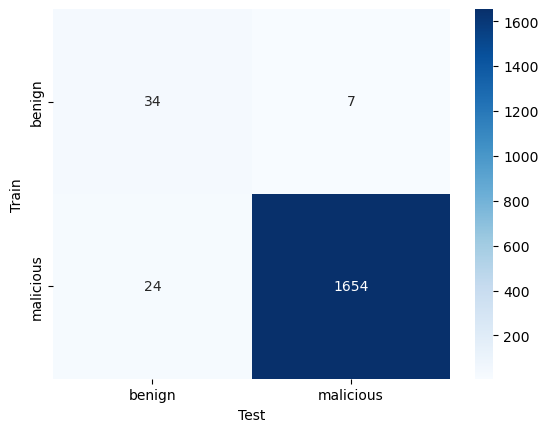

In [83]:
import pandas as pd
import seaborn as sb
model = tensorflow.keras.models.load_model('D:\Research-Final\Output.keras')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for i in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['Test','Train'])
confusion_matrix = pd.crosstab(out_df['Train'],out_df['Test'], rownames=['Train'], colnames=['Test'])

sb.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()

In [84]:
print('accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

accuracy: 98.19662594531704
